## 2.1 딥러닝 기본?? ㅋㅋ...


딥러닝에 등장하는 수학 개념들
- 텐서
- 텐서 연산
- 미분
- 경사 하강법

모든 딥러닝은 과적합? 을 피하기 위해 훈련셋, 테스트셋으로 나뉜다

In [ ]:
from keras.datasets import mnist
(train_images, train_labels) , (test_images, test_labels)= mnist.load_data()
train_images.shape

(60000, 28, 28)

In [ ]:
# 간단한 신경망 구조 만들기
# 각 데이터 처리 필터(층)들은 입력된 데이터로부터 추출해낸다.
from keras import models
from keras import layers
net = models.Sequential()

net.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))

net.add(layers.Dense(10, activation='softmax'))
# softmax 함수를 이용해 0~9까지의 숫자(10개)가 출력되는 확률을 나타내주는 층이다.

## 신경망이 훈련 준비를 마치기 위한 컴파일 단계
- 1. 손실 함수 : 훈련 데이터에서 신경망의 성능을 측정하는 방법
- 2. 옵티마이저 : 입력된 데이터와, 손실함수를 기반으로 네트워크를 업데이트 하는 메커니즘
- 3. 훈련과 테스트 과정을 모니터링할 지표 : accuray(정확도)

In [ ]:
net.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

- 훈련을 시작하기 전, 데이터를 네트워크에 맞는 크기로 바꾸어주고
  - 
- 0과1사이로 스케일링 해줘야 한다.
  - 입력 데이터의 스케일에 민감하여 전처리가 필요 ( 위의 경우 이미지 데이터는 픽셀의 최대값이 255로 나누어 주어야 함)
- 레이블은 범주형으로 인코딩해야 함

In [ ]:
train_images = train_images.reshape(60000, 28*28)
train_images = train_images.astype('float32')/255

test_images = test_images.reshape(10000, 28*28)
test_images = test_images.astype('float32')/255

from tensorflow.keras.utils import to_categorical
# tensorflow v2 가 도입되면서 변경됨!!
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
net.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 8ms/step - loss: 0.2591 - accuracy: 0.9256
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.1043 - accuracy: 0.9697
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0679 - accuracy: 0.9795
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0499 - accuracy: 0.9852
Epoch 5/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0369 - accuracy: 0.9894


model.evaluate( test dataset, test label )
- evaluate 함수로 검증 데이터셋의 loss, accuracy 를 알 수 있다

In [ ]:
test_loss, test_acc = net.evaluate(test_images, test_labels)
print('test acc' , test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0674 - accuracy: 0.9786
test acc 0.978600025177002


테스트 세트의 정확도 : 97.8%

훈련 세트의 정확도 : 98.9%

테스트 세트가 훈련 세트보다 약간 낮은걸 알 수 있는데, 이 차이는 과대적합(overfitting)때문이다.
  - 훈련 데이터보다 새로운 데이터에서 성능이 낮아지는 경향

## 2.2 신경망을 위한 데이터 표현
- 텐서(tensor) : 데이터를 위한 컨테이너 ( 특히 숫자)
  - 임의의 차원 개수를 가지는 행렬의 일반화된 모습 ( 차원(dimension)을 축(axis) 라고 함)

  - 스칼라(0D 텐서)
    - 하나의 숫자만 담고 있는 텐서 ( 0차원 텐서)
    - 넘파이의 경우 float32, 등의 숫다 타입

  - 벡터 (1D 텐서)
    - 딱 하나의 축을 가짐

  - 행렬 (2D 텐서)
    
  - 3D 텐서, 고차원 텐서

- 텐서의 속성
  - 축의 개수(랭크) : ndim 의 값
  - 크기 : 텐서의 각 축을 따라 얼마나 많은 차원이 있는지 나타내는 튜플 값
  - 데이터 타입 : float32, uint8, float64 등 ( 단. 연속된 메모리에 저장되어야 하기 때문 가변 길이의 문자열은 지원 X)

In [ ]:
# 스칼라 0D 텐서
import numpy as np
x = np.array(12)
x.ndim

0

In [ ]:
# 벡터 1D 텐서
# x는 4개의 원소를 가지고 있으므로 4차원 벡터 
# 4D 벡터는 하나의 축을 가지고 4개의 차원을 가진 것
# 4D 텐서는 4개의 축을 가진 것 (혹은 랭크가 4인 텐서)
x = np.array([12,3,6,14])
x.ndim

1

11501568/11490434 [==============================] - 0s 0us/step
3
(60000, 28, 28)
uint8


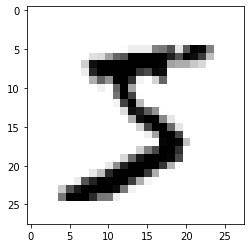

In [3]:
from keras.datasets import mnist
(train_img, train_label), (test_img, test_label) = mnist.load_data()
print(train_img.ndim)
print(train_img.shape)
print(train_img.dtype)

# 8비트 정수형, 3D 텐서
# 28 * 28 크기의 정수 행렬이 6만개
digit = train_img[0]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

#### 넘파이로 텐서 조작하기 
- 슬라이싱 
- 배치 데이터 
  - 딥러닝에 활용되는 모든 데이터 텐서의 첫 번째 축 : 샘플 축(sample axis)
- 텐서의 실제 사례
  - 벡터 데이터
    - 첫 번째 축 : 샘플 축
    - 두 번째 축 : 특성 축
    - e.g. (사람 나이, 우편번호, 소득) 의 전체 인구 데이터 셋 : (100000, 3)
    - e.g. (공통 단어 2만개로 만든 사전) -> 문서 500개로 만들어진 데이터셋 ( 500, 20000)
  - 시계열 데이터 / 시퀀스 데이터
    - 데이터에 시간이 중요한 경우 3D 텐서로 저장
    - 각 샘플은 벡터의(2D 텐서) 시퀀스이므로 배치 데이터는 3D 텐서로 인코딩 될 것
    - e.g. (주식 가격 데이터셋) : 250일치 데이터셋 -> (250, 390, 3) # 하루 거래시간 390분
    - e.g. (트윗 데이터셋) : 각 트윗은 128개의 알파벳으로 구성된 280개의 문자 시퀀스 
      - 각 트윗은 128개의 이진 벡터로 인코딩 (사용시 1, 미사용시 0)
      - 각 트윗은 ( 280, 128) 크기의 2D 텐서로 인코딩
      - 100만개의 트윗으로 구성된 데이터셋 -> ( 1000000, 280, 128)
  - 이미지 데이터
    - 전형적인 3차원 데이터 (높이, 너비, 컬러)
    - 흑백 이미지에 대한 128개의 배치 -> (128,256,256,1)
    - 컬러 이미지에 대한 128개의 배치 -> (128,256,256,3)
    - 텐서의 크기를 지정하는 방식은 2 가지
      - 구글 텐서플로(channel-last)
        - (samples, height, width, color_depth)
      - 씨아노(channel first)
        - (samples, color_depth, height, width)
      - 케라스는 2개 다 지원~
  - 비디오 데이터
    - 5D 텐서 필요
    - (samples, frames, height, width, color_depth)
    - e.g. 60초짜리 144 * 256 유투브 비디오 클립을 초당 4프레임을 샘플링하면 240프레임이 된다
      - 위의 비디오 클립 4개 가진 배치 -> (4, 240,144,256,3)

In [5]:
mask = [0,2,4,6,8]
mask.shape

AttributeError: ignored

In [4]:
                    # 1차원,#2차원,#3차원
example = train_img[10:100, :, :]
example.shape

(90, 28, 28)

## 2.3 신경망의 톱니바퀴 : 텐서 연산

#### 원소별 연산

In [ ]:
def naive_relu(x):
  assert len(x.shape)==2

  x = x.copy() # 입력 텐서 자체가 바뀌지 않도록 복사
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i, j] = max(x[i,j], 0)
  return x

# 덧셈
def naive_add(x,y):
  assert len(x.shape)==2
  assert x.shape == y.shape
  x=x.opy()
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i,j]+= y[i,j]
  return x

#### 브로드캐스팅 : 크기가 다른 2개의 텐서를 연산할때 활용
  - 큰 텐서의 ndim에 맞도록 작은 텐서에 축이 추가
  - 작은 텐서가 새 축을 따라 큰 텐서의 크기에 맞도록 반복

e.g.  
- x=(32,10), y=(10,)  # y에 새로운 축 추가
- x=(32,10), y=(1,10) # y를 새로 추가된 축에 32번 반복
- x=(32,10), y=(32,10)


In [ ]:
def naive_add_matrix_and_vector(x,y):
  assert len(x.shape)==2          # x는 2D 넘파이 배열
  assert len(y.shape)==1          # y는 넘파이 벡터
  assert x.shape[1] == y.shape[0] 

  x = x.copy()
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i,j] += y[j]
  return x

import numpy as np
x=np.random.random((64,3,32,10))
y = np.random.random((32,10))
z = np.maximum(x,y) # 출력 z의 크기는 x와 동일한 64,3,32,10
z.shape

(64, 3, 32, 10)

#### 텐서 점곱

In [ ]:
import numpy as np
x=[1,2]
y=[3,4]
z = np.dot(x,y)
# z= x ˙ y

def naive_vector_dot(x,y):
  assert len(x.shape)==1
  assert len(y.shape)==1
  assert x.shape[0] == y.shape[0]

  z=0.
  for i in range(x.shape[0]):
    z+=x[i] * y[i]
  return z

#### 텐서 크기 변환
- 재배치 (.reshape)
- 전치 (np.transpose)

In [ ]:
#train_img = train_img.reshape((60000, 28*28))
x=np.array([[0,1],
   [2,3,],
   [4,5]])
print(x.shape)
x = np.transpose(x)
print(x.shape)

(3, 2)
(2, 3)


## 2.4 그래디어튼 기반 최적화


#### 변화율
- 함수의 기본적인 연속성 ( x가 바뀌면, y도 같이 바뀐다
  - f(x+epsilon_x) = y + epsilon_y
- epsilon_x 가 충분히 작다면, 어떤 포인트 p 에서 기울기 a의 선형함수로 구현 가능
  - f(x+epsilon_x) = y + a * epsilon_x
  - 이 기울기를 p에서 f 의 변화율이라고 한다
  - 변화율 함수 : f'(x)

#### 그래디언트 
- 텐서 연산의 변화율
- 텐서를 입력으로 받는 함수에 변화율 개념을 확장 시킨 것.
- 

In [19]:
import numpy as np


tmp = np.arange(1,20)

x = np.arange(1,20,2)
tmp

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])

In [13]:
B

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])

In [22]:
answer = [ no for no in x if no in tmp]


for t in fid5:
  for x in dif:
    if t.str.contains(x):
      list.append(x/t)

In [23]:

answer

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]